In [14]:
# load pandas and numpy libaries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import missingno as msno 
import seaborn as sns 

df = pd.read_csv("https://raw.githubusercontent.com/Jaar06/John/main/Players%20file.csv")
df.head()

,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings
0,1,zombs,13,5,1,1,"$113,550"
1,2,ShahZaM,13,4,1,1,"$113,450"
2,3,dapr,14,3,1,1,"$112,870"
3,4,SicK,12,3,1,1,"$112,650"
4,5,cNed,12,4,2,1,"$107,735"


In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import missingno as msno 
import seaborn as sns
#column names 
column_names = ['Rank', 'Player', 'Gold', 'Silver', 'Bronze', 'S Tier', 'Earnings']

#the data didn't have headers so I wrote them in 
df = pd.read_csv("https://raw.githubusercontent.com/Jaar06/John/main/Players%20file.csv", header=None, names = column_names)

#the orginal headers become the first row, since I set header = None, so i need to delete 0 row to get rid of it 
df = df.drop(0)

#create a second copy of the data just in case 
df_original = df 

#check the dimensions of the data 
print('The dimensions of the data are:', df.shape)

#show the beginning of the data 
df.head()

The dimensions of the data are: (500, 7)


,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings
1,1,zombs,13,5,1,1,"$113,550"
2,2,ShahZaM,13,4,1,1,"$113,450"
3,3,dapr,14,3,1,1,"$112,870"
4,4,SicK,12,3,1,1,"$112,650"
5,5,cNed,12,4,2,1,"$107,735"


#Now in the data set we see the different columns that are really important to keep in mind. **Rank, Player, Gold, Silver, Bronze, S Tier, and Earnings**. The Rank is their Rank in game. Player is the names of the people in that rank. Now *Gold, Silver, Bronze, and S Tier* are the just the place holder names. But what they mean are this. *Gold are events that they finished in 1st place. Silver are events that they finished in 2nd place. Bronze are events that they finished in 3rd place and last S tier is where they finished 1st place in a major event*. Now the earnings shown are the total money won in Valorant esports. 

#There are *two questions* that I'm going to explore in this data. How well did the top 5 players do? and who made the most earnings? 

#Now let's make a null hypothesis and an alternative hypothesis 

Null hypothesis: Everyone has made the same amount of earnings no matter what rank they are

alternative hypothesis: Everyone's rank depends on how much they are earning 

In [17]:
#check if we have any empty data 
df.isna().sum()

Rank        0
Player      0
Gold        0
Silver      0
Bronze      0
S Tier      0
Earnings    0
dtype: int64

There isn't any empty data shown here 

In [23]:
df.count()

Rank        500
Player      500
Gold        500
Silver      500
Bronze      500
S Tier      500
Earnings    500
dtype: int64

Checking for data count in players data

In [24]:
df.duplicated().sum()

0

Checking for duplicate values in players data

In [31]:
## Converting Earnings feature to numeric
df['Earnings'] = pd.to_numeric(df['Earnings'])


if df['Earnings'].dtype in ['int64','float64']:
    print('Conversion done')
else:
    print('Please try once again')

Conversion done


In [30]:
#Basic Players data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rank,500,468,405,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Player,500,499,k1Ng,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gold,500,25,3,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Silver,500,14,3,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bronze,500,9,1,154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S Tier,500,2,0,485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Earnings,500.0,NaN,NaN,NaN,17646.662,19277.866853,5530.0,7272.75,10723.0,18471.75,113550.0


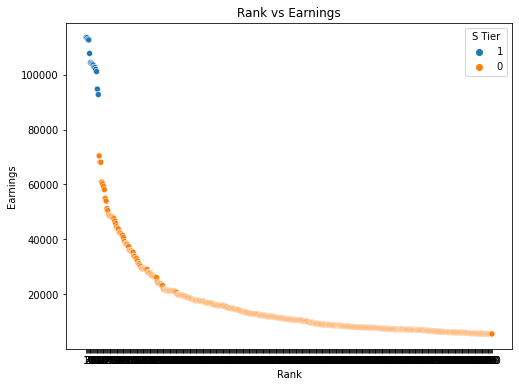

In [48]:
# Relationship between Rank and Earnings
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='Rank', y='Earnings', hue='S Tier')
plt.title('Rank vs Earnings')
plt.show()